In [67]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import random

In [68]:
f1 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_38.csv')    #8 datasets for introducing faults into them
f2 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_37.csv')
f3 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_36.csv')
f4 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_35.csv')
f5 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_34.csv')
f6 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_33.csv')
f7 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_32.csv')
f8 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data\final_cooling_dset_31.csv')
og = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\cooling_system.csv')

Making sure that the synthetic data meets the data ranges.

In [69]:
f1

,Unnamed: 0,65262-110,65263-111,64817-1598
0,0,89.626630,79.704887,4095.4954
1,1,89.606170,79.704270,4095.4841
2,2,89.605545,79.704266,4095.4836
3,3,89.605484,79.704266,4095.4836
4,4,89.605470,79.704266,4095.4836
...,...,...,...,...
92539,92539,89.233950,79.999897,4095.9812
92540,92540,89.233950,79.999897,4095.9812
92541,92541,89.233950,79.999897,4095.9812
92542,92542,89.233950,79.999897,4095.9812


In [70]:
dsets = [f1, f2, f3, f4, f5, f6, f7, f8]

In [71]:
for i in range(len(dsets)):
    dsets[i].drop(['Unnamed: 0'], axis=1, inplace=True)

In [72]:
dsets[0]

,65262-110,65263-111,64817-1598
0,89.626630,79.704887,4095.4954
1,89.606170,79.704270,4095.4841
2,89.605545,79.704266,4095.4836
3,89.605484,79.704266,4095.4836
4,89.605470,79.704266,4095.4836
...,...,...,...
92539,89.233950,79.999897,4095.9812
92540,89.233950,79.999897,4095.9812
92541,89.233950,79.999897,4095.9812
92542,89.233950,79.999897,4095.9812


Plotting some graphs to compare the synthetic data to the real data

In [73]:
#Function to plot moving average graph
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

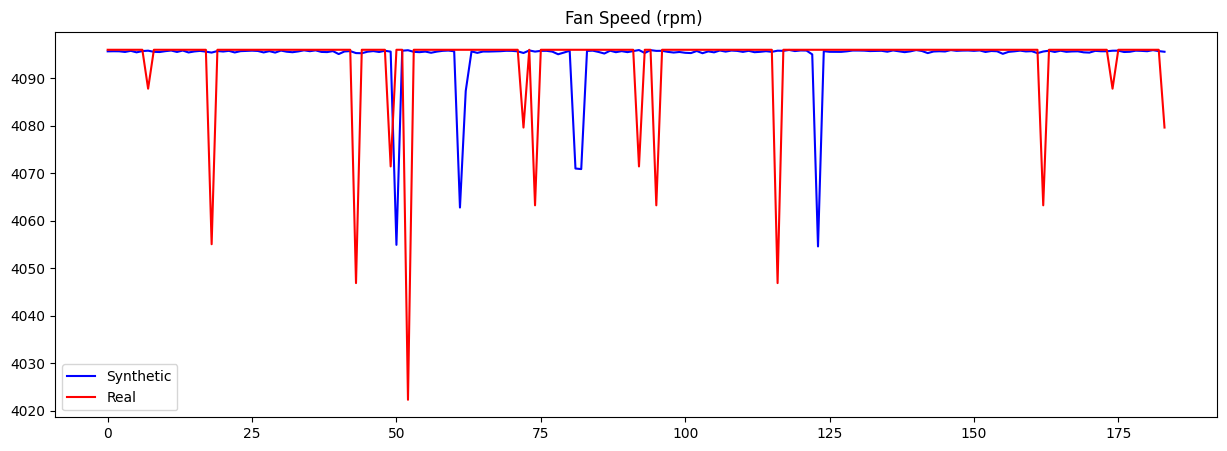

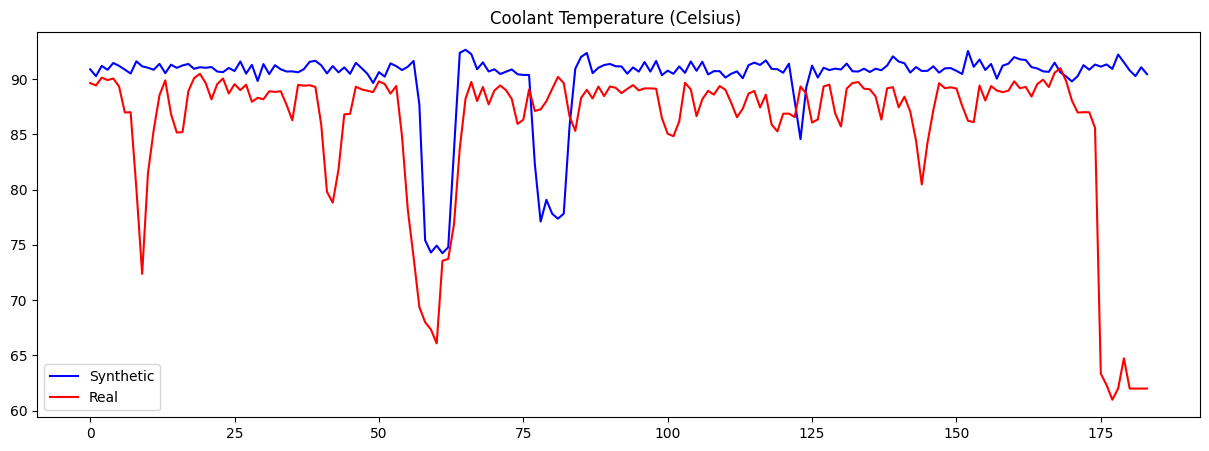

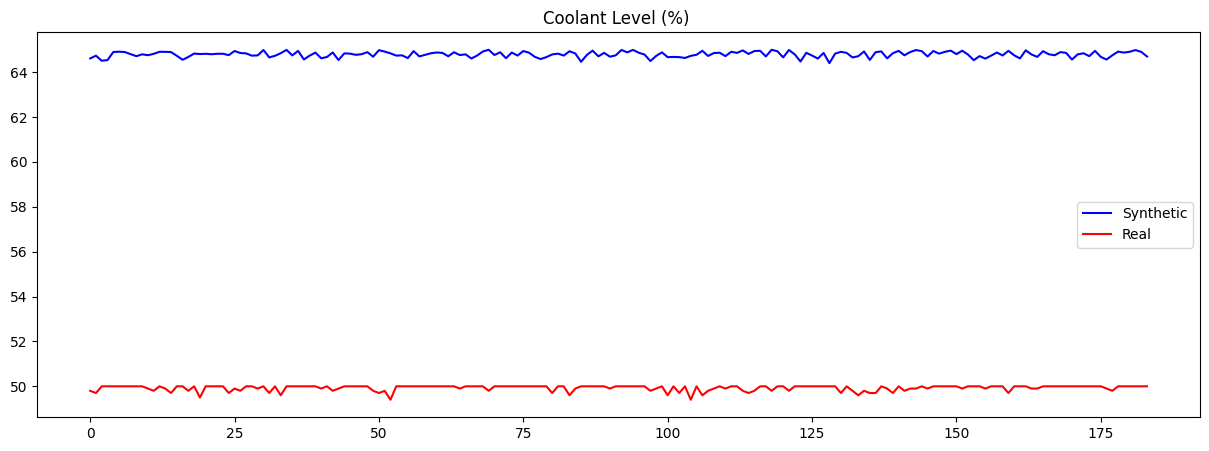

In [74]:
        w=500
        plt.figure(figsize=(15,5))
        v1 = dsets[4]['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Fan Speed (rpm) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = dsets[4]['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Coolant Temperature (Celsius) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = dsets[4]['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Coolant Level (%) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()

In [75]:
len(og.loc[27669:41000])

13332

In [76]:
og.describe()

,Unnamed: 0,64817-1598,65263-111,65262-110
count,92560.000000,92560.000000,92560.000000,92560.000000
mean,46281.500000,4093.787381,49.928155,85.698293
std,26719.914795,95.173993,1.893975,7.293150
min,2.000000,0.000000,0.000000,-40.000000
25%,23141.750000,4096.000000,50.000000,86.000000
50%,46281.500000,4096.000000,50.000000,88.000000
75%,69421.250000,4096.000000,50.000000,90.000000
max,92561.000000,4096.000000,50.000000,94.000000


In [77]:
dsets[0].describe()

,65262-110,65263-111,64817-1598
count,92544.000000,92544.000000,92544.000000
mean,88.413291,79.801579,4094.283015
std,6.203555,0.377262,73.730879
min,68.282240,76.243210,0.000000
25%,89.133575,79.765972,4095.458300
50%,90.515884,79.994534,4095.831000
75%,91.823850,79.999996,4095.964800
max,95.330050,80.000000,4096.000000


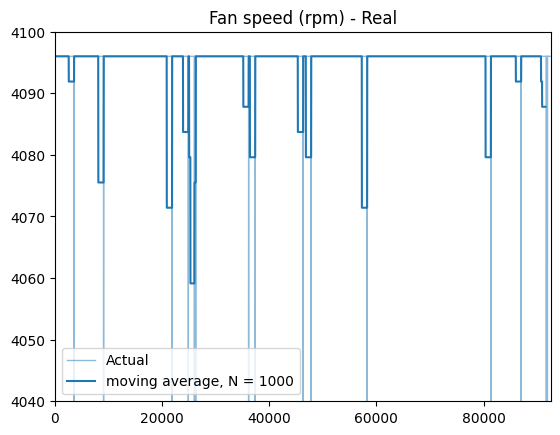

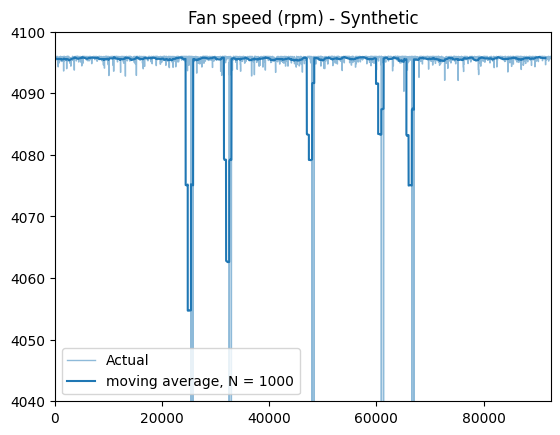

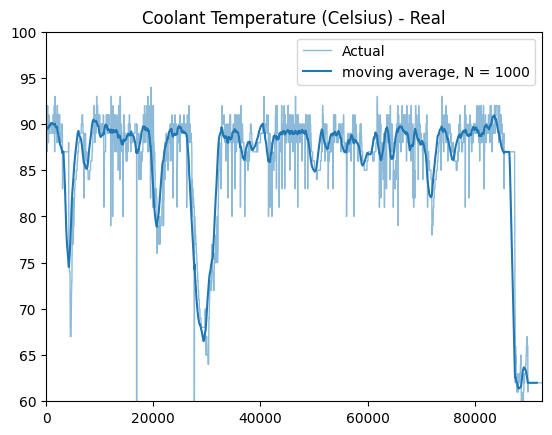

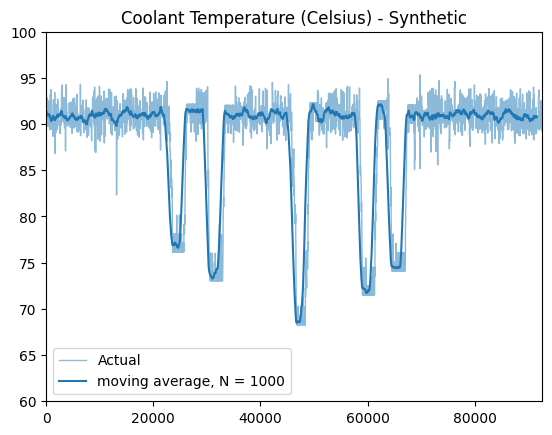

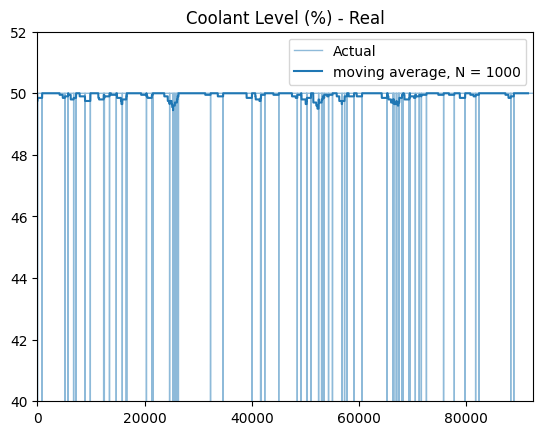

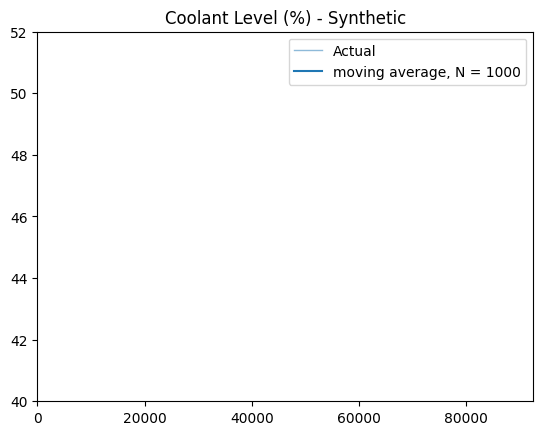

In [78]:

plt.plot(og['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Real')
plt.legend()
plt.show()
plt.plot(dsets[0]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Synthetic')
plt.legend()
plt.show()
plt.plot(og['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Real')
plt.legend()
plt.show()
plt.plot(dsets[0]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Synthetic')
plt.legend()
plt.show()
plt.plot(og['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65263-111']))
plt.ylim(40, 52)
plt.title('Coolant Level (%) - Real')
plt.legend()
plt.show()
plt.plot(dsets[0]['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65263-111']))
plt.title('Coolant Level (%) - Synthetic')
plt.legend()
plt.show()

Below is the first type of fault introduced

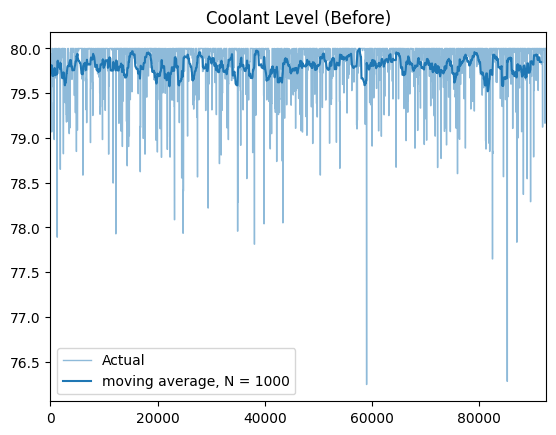

In [79]:
#Plotting the Coolant Level with faults
plt.plot(dsets[0]['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65263-111']))
#plt.ylim(40, 52)
plt.title('Coolant Level (Before)')
plt.legend()
plt.show()

In [80]:
#Picking Dataset dsets[0] and f2
'''The first fault involves lowering the coolant level by 15% or so to indicate a potential leakage in the cooling system'''
valadd = 0.15/len(dsets[0])
val = 0
for index, row in dsets[0].iterrows():
    val += row[1] * valadd
    if(row[1] - val >= 30):
        dsets[0].loc[index, '65263-111'] -= val
valadd = 0.10/len(dsets[1])
val = 0
for index, row in dsets[1].iterrows():
    val += row[1] * valadd
    if(row[1] - val >= 30):
        dsets[1].loc[index, '65263-111'] -= val


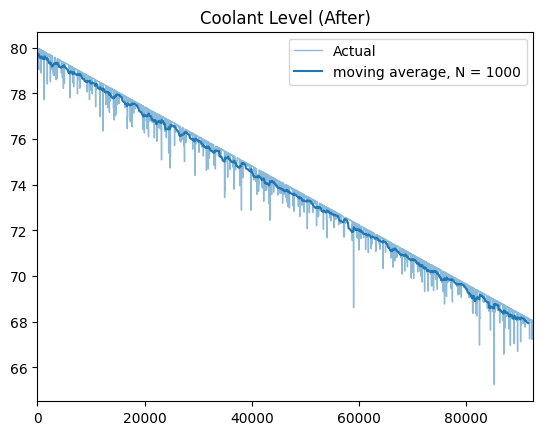

In [81]:
#Plotting the Coolant Level with faults
plt.plot(dsets[0]['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65263-111']))
#plt.ylim(30, 52)
plt.title('Coolant Level (After)')
plt.legend()
plt.show()

Below is the second type of fault

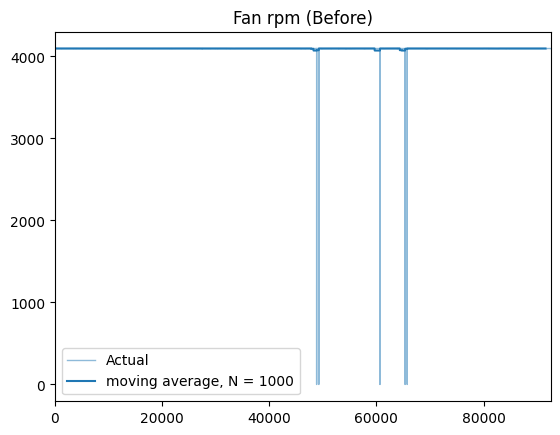

In [82]:
plt.plot(dsets[2]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

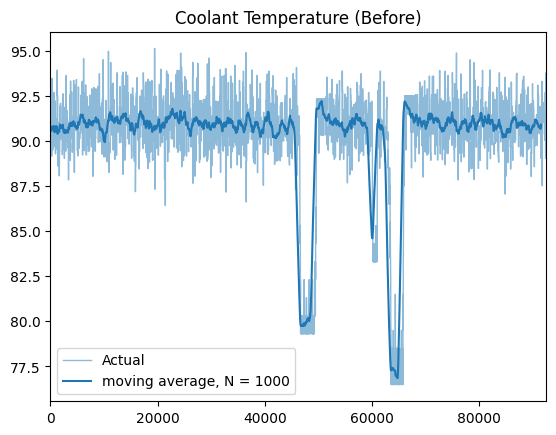

In [83]:
plt.plot(dsets[2]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [84]:
#Picking Dataset f3 and f4
'''The second fault involves lowering the fan rpm by 30% or so and increasing the coolant temperature slightly to indicate a fan deterioration'''
valadd = 0.025/len(dsets[2])
val = 0
for index, row in dsets[2].iterrows():
    val += row[0] * valadd
    dsets[2].loc[index, '64817-1598'] -= row[2] * 0.30
    dsets[2].loc[index, '65262-110'] += val
valadd = 0.030/len(dsets[3])
val = 0
for index, row in dsets[3].iterrows():
    val += row[0] * valadd
    dsets[3].loc[index, '65262-110'] += val
    dsets[3].loc[index, '64817-1598'] -= row[2] * 0.35

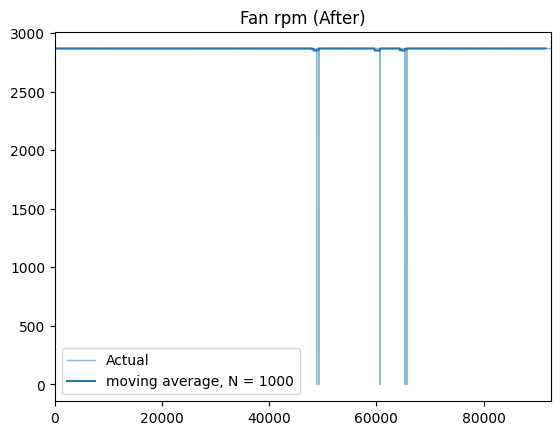

In [85]:
plt.plot(dsets[2]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

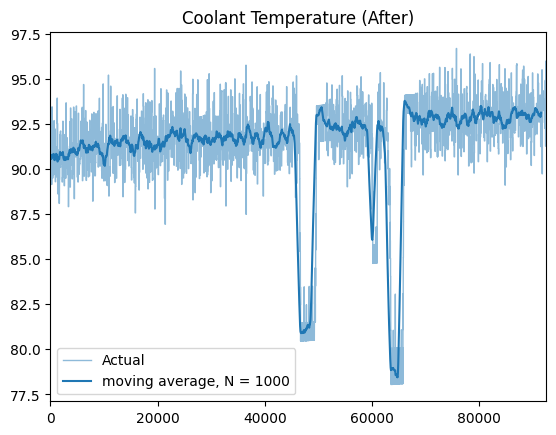

In [86]:
plt.plot(dsets[2]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()

Below is the third fault

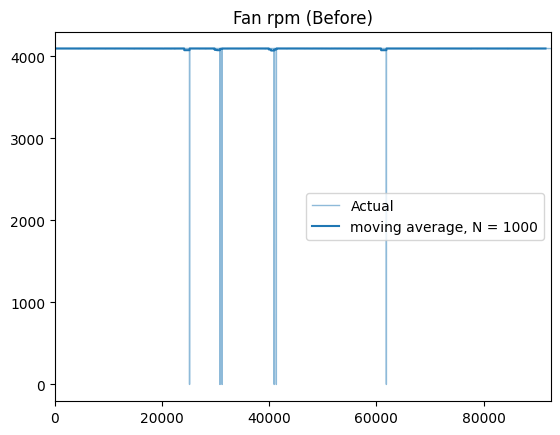

In [87]:
plt.plot(dsets[4]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[4]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[4]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

In [88]:
#Picking Dataset f5 and f6
'''The second fault involves increasing the fan rpm by 15% or so to indicate a fan deterioration'''
for index, row in dsets[4].iterrows():
    if(row[2]!=0):
        dsets[4].loc[index, '64817-1598'] += row[2] * 0.15
for index, row in dsets[5].iterrows():
    if(row[2]!=0):
        dsets[5].loc[index, '64817-1598'] += row[2] * 0.10

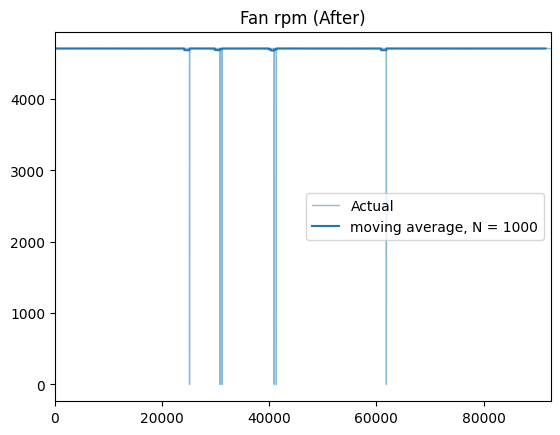

In [89]:
plt.plot(dsets[4]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[4]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[4]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

Below is the fourth type of fault introduced

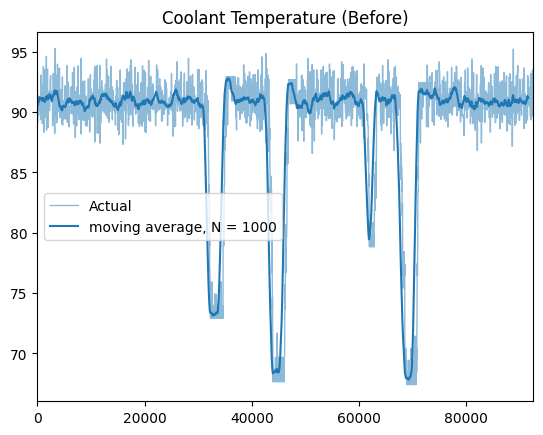

In [90]:
plt.plot(dsets[6]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[6]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[6]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [91]:
#Picking Dataset f7 and f8
'''The fourth fault involves increasing the coolant temperature by 15% or so to indicate a cooling system issue'''
valadd = 0.15/len(dsets[6])
val = 0
for index, row in dsets[6].iterrows():
    val += row[0] * valadd
    dsets[6].loc[index, '65262-110'] += val
valadd = 0.10/len(dsets[7])
val = 0
for index, row in dsets[7].iterrows():
    val += row[0] * valadd
    dsets[7].loc[index, '65262-110'] += val

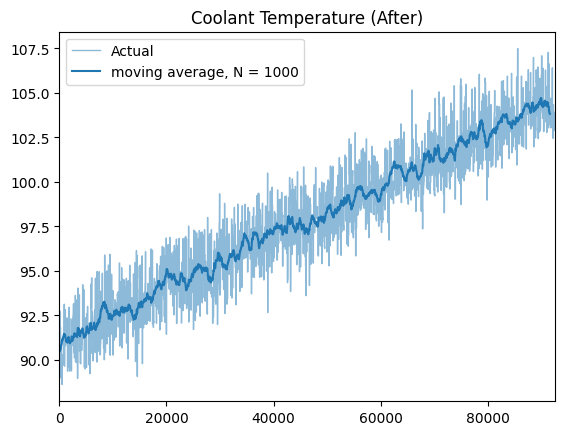

In [ ]:
plt.plot(dsets[6]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[6]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[6]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()

In [ ]:
path = r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data'
for i in range(len(dsets)):         #Creating a list of all the datasets
    dsets[i].to_csv(path+'\\faulty_cooling_dset_'+str(i)+'.csv')
